In [1]:
%load_ext blackcellmagic

In [2]:
import numpy as np
import pandas as pd
import numba
from math import ceil

from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import tqdm

In [3]:
import colorcet as cc
import holoviews as hv
hv.extension("matplotlib")

import colorcet as cc
ceiling = np.vectorize(ceil)
sample_cycle = lambda cycle, size: hv.Cycle(
    [cycle[i] for i in ceiling(np.linspace(0, len(cycle) - 1, size))]
)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [4]:
import lattice_signaling as lsig
from scipy.sparse import csr_matrix

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [6]:
# def act_sc_vmean(t, E_save, thresh, sender_idx=0, r=1):
#     """
#     """
#     # Check if there are ony 2 cells
#     assert E_save.shape[1] == 2, "must supply data for 2 cells (E_save of shape (n_t, 2))"
    
#     # Find where transceiver expression crosses threshold
#     crossed = np.argmax(E_save[:, 1 - sender_idx] > thresh)
    
#     # If it never does, return 0. Otherwise, return velocity
#     if crossed == 0:
#         return 0
#     else:
#         return r / (t[crossed] - t[0]) 

# def act_vmean(t, X, E_save, thresh, chull=False):
#     """
#     """
    
#     # Get time difference
#     dt = t[-1] - t[0]
    
#     # Get cells at boundary
#     if X.shape[0] < 3:
#         X_where_bounds = np.array([i for i in range(X.shape[0])])
#     else:
#         X_where_bounds = ConvexHull(X).vertices
    
#     crossed = np.argmax(E_save[:, X_where_bounds].sum(axis=1) > thresh)
#     if crossed > 0:
#         tr = t[:crossed].copy()
#     else:
#         tr = t.copy()

#     # Get activated cells at first and last time
#     Et0, Etlast = E_save[0] > thresh, E_save[-1] > thresh
    
#     # Calculate area using convex hull volume or sum of cell areas
#     if chull:
        
#         # Exclude time-points with <3 points (throws error)
#         if np.sum(Et0) < 3:
#             a0 = 0
#         else:
#             a0 = ConvexHull(X[Et0]).volume
            
#         if np.sum(Etlast) < 3:
#             alast = 0
#         else:
#             alast = ConvexHull(X[Etlast]).volume
#     else:
#         a0 = E0.sum() * np.sqrt(3)/2
#         alast = Etlast.sum() * np.sqrt(3)/2
    
#     dr = np.diff(np.sqrt(np.array([a0, alast]) / np.pi))
    
#     return dr/dt
    

# def act_radius_hex(t, X, E_save, thresh, L, chull=False):
#     """
#     """
    
#     # Get time-step
#     dt = t[1] - t[0]
    
#     # Get activated cells at each time
#     Et = E_save > thresh
    
#     # Calculate area using convex hull volume or sum of cell areas
#     if chull:
        
#         # Exclude time-points with <3 points (throws error)
#         where_chull = np.argwhere(np.sum(Et, axis=1) > 2).ravel()
#         a = np.zeros(Et.shape[0], dtype=np.float32)
#         for i in where_chull: 
#             a[i] = ConvexHull(X[Et[i]]).volume
#     else:
#         Etsum = Et.sum(axis=1)
#         a = Etsum * np.sqrt(3)/2
    
#     return get_radius(t, a, L)
    
    
# @numba.njit
# def get_radius(t, a, L):
#     """
#     """
#     # Calculate estimated radius, assuming cells are 
#     #   identical hexagons of side length 1/sqrt(3)
#     r  = np.sqrt(a / np.pi).astype(np.float32)
    
#     # Truncate if the radius reaches the periodic boundary
#     bound = (L-1)*np.sqrt(3)/4
#     crossed = np.argmax(r > bound)
#     if crossed > 0:
#         r = r[:crossed]
#         tr = t[:crossed]
#     else:
#         tr = t.copy()
        
#     # Isolate time-points where area changes
#     jumps = np.diff(r[:-1]).nonzero()[0]
    
#     # Construct output
#     t_out = np.empty(jumps.size + 2)
#     r_out = np.empty(jumps.size + 2)
#     t_out[0], t_out[1:-1], t_out[-1] = tr[0], tr[jumps], tr[-1]
#     r_out[0], r_out[1:-1], r_out[-1] = r[0], r[jumps], r[-1]
    
#     return t_out, r_out

# def hex_Adj_el(L, el=1, dtype=np.float32, csr=True):
#     """
#     Returns the a hexagonal lattice and its adjacency 
#     matrix Adj, the proportion of its perimeter that each
#     hexagon shares with other hexagons.
#     """
#     # Get # cells
#     n = L ** 2
    
#     # Make hexagonal grid
#     r = el * np.sqrt(3)
#     X = lsig.hex_grid_square(n, r=r)
    
#     # Construct adjacency matrix
#     aij = 1
#     Adj = np.zeros((n,n), dtype=dtype)
#     for i in range(L):
#         for j in range(L):
            
#             # Get neighbors of cell at location i, j
#             nb = np.array(
#                 [
#                     (i    , j + 1),
#                     (i    , j - 1),
#                     (i - 1, j    ),
#                     (i + 1, j    ),
#                     (i - 1 + 2*(j%2), j - 1),
#                     (i - 1 + 2*(j%2), j + 1),
#                 ]
#             ) % L
            
#             # Populate Adj
#             nbidx = np.array([ni*L + nj for ni, nj in nb])
#             Adj[i*L + j, nbidx] = aij
    
#     if csr:
#         Adj = csr_matrix(Adj)
    
#     return X, Adj

# def integrate_DDE(
#     t_span,
#     rhs,
#     dde_args,
#     E0,
#     delay,
#     progress_bar=False,
#     min_delay=5,
# ):
#     # Get # time-points, dt, and # cells
#     n_t = t_span.size
#     dt = t_span[1] - t_span[0]
#     n_c = E0.size
    
#     # Get delay in steps
#     step_delay = np.atleast_1d(delay) / dt
#     assert (step_delay >= min_delay), (
#         "Delay time is too short. Lower dt or lengthen delay."
#     )
#     step_delay = ceil(step_delay)
    
#     # Initialize expression vector
#     E_save = np.empty((n_t, n_c), dtype=np.float32)
#     E_save[0] = E = E0
    
#     # Construct time iterator
#     iterator = np.arange(1, n_t)
#     if progress_bar:
#         iterator = tqdm.tqdm(iterator)

#     for step in iterator:
#         # Get past E
#         past_step = max(0, step - step_delay)
#         E_delay = E_save[past_step]
        
#         # Integrate
#         dE_dt = rhs(E, E_delay, *dde_args)
#         E = np.maximum(0, E + dE_dt * dt) 
#         E_save[step] = E
    
#     return E_save


# def integrate_DDE_vararg(
#     t_span,
#     rhs,
#     var,
#     dde_args,
#     E0,
#     delay,
#     progress_bar=False,
#     min_delay=5,
#     where_var=5,
# ):
#     # Get # time-points, dt, and # cells
#     n_t = t_span.size
#     dt = t_span[1] - t_span[0]
#     n_c = E0.shape[0]
    
#     # Get delay in steps
#     step_delay = np.atleast_1d(delay) / dt
#     assert (step_delay >= min_delay), (
#         "Delay time is too short. Lower dt or lengthen delay."
#     )
#     step_delay = ceil(step_delay)
    
#     # Initialize expression vector
#     E_save = np.empty((n_t, n_c), dtype=np.float32)
#     E_save[0] = E = E0
    
#     # Make dde_args mutable
#     dde_args = list(dde_args)
    
#     # Construct time iterator
#     iterator = np.arange(1, n_t)
#     if progress_bar:
#         iterator = tqdm.tqdm(iterator)

#     for step in iterator:
#         # Get past E
#         past_step = max(0, step - step_delay)
#         E_delay = E_save[past_step]
        
#         # Get past beta
#         v = var[past_step]
#         dde_args[where_var] = v
        
#         # Integrate
#         dE_dt = rhs(E, E_delay, *dde_args)
#         E = np.maximum(0, E + dE_dt * dt) 
#         E_save[step] = E
    
#     return E_save


<hr>

Gradient of cell shape in a long form - like presomitic mesoderm "kinematic wave"?

<hr>

In [7]:
L = 21
X, Adj = lsig.hex_Adj(L, r=np.sqrt(3), csr=False)
n = X.shape[0]
sender_idx = lsig.get_center_cells(X)[0]

In [8]:
# Define RHS
@numba.njit
def hex_tc_rhs(E, E_delay, Adj, sender_idx, alpha, k, p, delta, lambda_, beta):
    """
    Returns RHS of transceiver DDE.
    """
    # Get signaling across each interface
    E_bar = beta / 6 * (Adj @ E_delay) 
    
    # Calculate dE/dt
    dE_dt = (
        lambda_
        + alpha * (E_bar ** p) / (k ** p + (delta * E_delay) ** p + E_bar ** p)
        - E
    )
    
    # Set sender cell to zero
    dE_dt[sender_idx] = 0
    
    return dE_dt


def get_hex_rhs(Adj, sender_idx):
    def rhs(E, E_delay, *args):
        return hex_tc_rhs(E, E_delay, Adj, sender_idx, *args)
    return rhs

In [52]:
# Define RHS for concentration
@numba.njit
def hex_tc_conc_rhs(S, S_delay, Adj, sender_idx, alpha, k, p, delta, beta, ell):
    """
    """

    # Get input signal across each interface
    S_bar = beta * ell * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        alpha
        * (S_bar ** p)
        / (
            (6 / np.sqrt(3) * k) ** p
            + (6 / np.sqrt(3) * delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt


def get_hex_conc_rhs(Adj, sender_idx):
    def rhs(E, E_delay, *args):
        return hex_tc_conc_rhs(E, E_delay, Adj, sender_idx, *args)
    return rhs

For a given cell $i$, we propose the following dynamical model.

\begin{align}
\frac{\mathrm{d} s_i}{\mathrm{d} t} = \dot{s_i} = \lambda + \alpha \,\frac{s_{i,\textit{trans}}^p}{k^p + \left(\delta\, s_{i,\textit{cis}}\right)^p + s_{i,\textit{trans}}^p} - s_i\\
\end{align}

Let 

\begin{align}
\mathbf{s}(t)=s_i(t), \; i\in\{1, ... n\}
\end{align}

be the concentration of signal molecule (ligand) $S$ expressed in each cell $i$ as a function of time $t$. For cells arranged on a regular lattice of edge length $\ell$, cell-cell signaling interactions can be represented as the flux $\dot{s}$ on a network.

\begin{align}
\dot{\mathbf{s}} &= \lambda + \alpha \,\frac{\mathbf{s}_\textit{trans}^p}{k^p + \left(\delta\, \mathbf{s}_\textit{cis}\right)^p + \mathbf{s}_\textit{trans}^p} - \mathbf{s}\\[1em]
\mathbf{s}_\textit{trans} &= \beta\,\ell\,A\,\mathbf{s}(t - \tau) \\[1em]
\mathbf{s}_\textit{cis} &= 6\,\ell\,\mathbf{s}(t - \tau),
\end{align}

where $\tau$ is the time delay due to transcription and translation of signal protein. Parameters $\alpha$ and $\lambda$ are the regulated and leaky signal production rates, respectively. The Hill threshold $k$, Hill coefficient $p$, and relative scaling factor $\delta$ govern the nonlinear response to $\mathbf{s}_\textit{trans}$ and $\mathbf{s}_\textit{cis}$, the total amounts of *trans-*ligand exposed to each cell and *cis-*ligand expressed by cell. Cell adjacency is encoded in the adjacency matrix

\begin{align}
A=\begin{pmatrix}
a_{ij}
\end{pmatrix}
=\left\{
\begin{array}\\
1 & \text{if cells $i$, $j$ are adjacent}\\
0 & \text{else}
\end{array}
\right.
\end{align}

Cell nuclei are assumed to be of constant volume, and thus the amount of ligand required to trigger promoter activation is considered invariant with respect to cell shape and volume. The cell-cell interface length $\beta$ is expressed as a proportion of lattice edge length $\ell$ ($\beta < 1$ indicates shortening of the interface, e.g. as a result of actomyosin-mediated cortical tension). 

<hr>

In [190]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 0
lambda_ = 1e-5
beta = 1

delay = 0.4

In [191]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [192]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0.01, 0.5, 20)
el_space = 1/np.sqrt(np.linspace(1, 2, 3))

free_params = (alpha_space, k_s_space, el_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [193]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel1 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, el = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel1[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 1200/1200 [02:18<00:00,  8.67it/s]


In [194]:
datael1 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "edge length": param_space[:, 2],
    "Mean wavefront speed": vmeansel1,
})

datael1["% confluency"] = 100 * datael1["edge length"] ** -2
datael1["Wavefront speed (cell lengths)"] = datael1["Mean wavefront speed"] / (datael1["edge length"] * np.sqrt(3))

:NdLayout   [% confluency]
   :Points   [signaling threshold,promoter strength]   (Wavefront speed (cell lengths),% confluency)
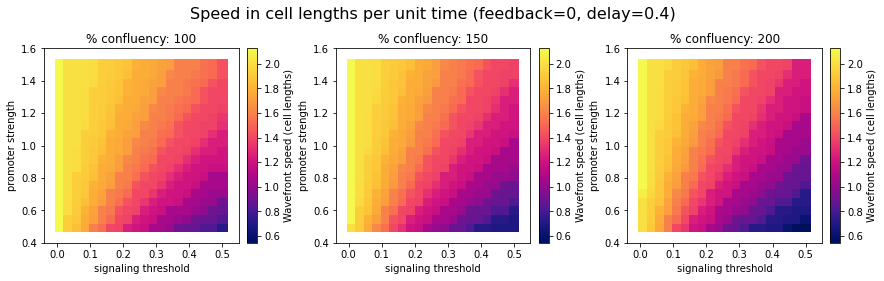

In [294]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=datael1,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["Wavefront speed (cell lengths)", "% confluency"],
).groupby(
    ["% confluency"]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
).opts(
    title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

<hr>

In [274]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 2
lambda_ = 1e-5
beta = 1

delay = 0.4

In [275]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [276]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0.01, 0.5, 20)
# el_space = 1/np.sqrt(np.linspace(1, 2, 3))

free_params = (alpha_space, k_s_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [277]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansratio1 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s = param_space[i]
    el = 1
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmean100norm = act_vmean(t, Xel, E, 0.1, chull=True) / (el*np.sqrt(3))
    
    el = 1/np.sqrt(2)
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )
    
    vmean200norm = act_vmean(t, Xel, E, 0.1, chull=True) / (el*np.sqrt(3))
    vmeansratio1[i] = vmean200norm / vmean100norm

100%|██████████| 400/400 [01:03<00:00,  6.28it/s]


In [278]:
dataratio1 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "speed ratio": vmeansratio1,
})

:Points   [signaling threshold,promoter strength]   (speed ratio)
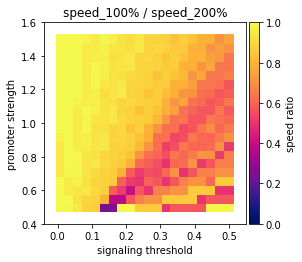

In [279]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=dataratio1,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["speed ratio"],
).opts(
    color="speed ratio",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
#     fontscale=1.2,
    title="speed_100% / speed_200%",
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"speed ratio":(0, 1)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

<hr>

In [159]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 2
lambda_ = 1e-5
beta = 1

delay = 0.4

In [160]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [161]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0.01, 0.5, 20)
el_space = 1/np.sqrt(np.linspace(1, 2, 2))

free_params = (alpha_space, k_s_space, el_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [162]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel1 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, el = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel1[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 800/800 [00:56<00:00, 14.19it/s]


In [163]:
datael1 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "edge length": param_space[:, 2],
    "Mean wavefront speed": vmeansel1,
})

datael1["% confluency"] = 100 * datael1["edge length"] ** -2
datael1["Mean speed (normalized)"] = datael1["Mean wavefront speed"] / (datael1["edge length"] * np.sqrt(3))

:NdLayout   [% confluency]
   :Points   [signaling threshold,promoter strength]   (Mean speed (normalized),% confluency)
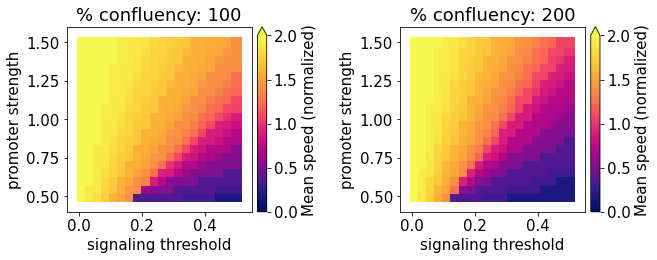

In [167]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=datael1,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["Mean speed (normalized)", "% confluency"],
).groupby(
    ["% confluency"]
).opts(
    color="Mean speed (normalized)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
    fontscale=1.5,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean speed (normalized)":(0, 2)}
).layout(
).opts(
    hspace=0.8,
    vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

<hr>

In [139]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
# delta = 0
lambda_ = 1e-5
beta = 1

delay = 0.4

In [140]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [141]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0.01, 0.5, 20)
delta_space = np.linspace(0, 4, 3)
el_space = 1/np.sqrt(np.linspace(1, 2, 2))

free_params = (alpha_space, k_s_space, delta_space, el_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [142]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, delta, el = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel2[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 2400/2400 [02:54<00:00, 13.72it/s]


In [143]:
datael2 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "feedback strength": param_space[:, 2],
    "edge length": param_space[:, 3],
    "Mean wavefront speed": vmeansel2,
})

datael2["% confluency"] = 100 * datael2["edge length"] ** -2
datael2["Mean speed (normalized)"] = datael2["Mean wavefront speed"] / (datael2["edge length"] * np.sqrt(3))

:NdLayout   [feedback strength,% confluency]
   :Points   [signaling threshold,promoter strength]   (Mean speed (normalized),% confluency,feedback strength)
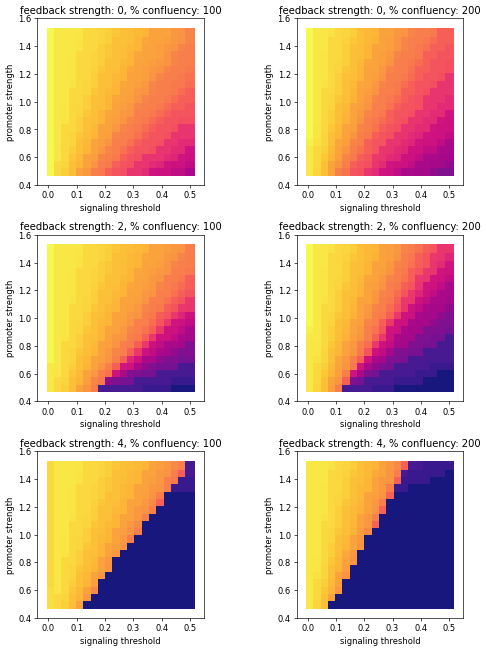

In [152]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=datael2,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["Mean speed (normalized)", "% confluency", "feedback strength"],
).groupby(
    ["feedback strength", "% confluency", ]
).opts(
    color="Mean speed (normalized)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean speed (normalized)":(0, None)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    2
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [57]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
# delta = 0
lambda_ = 1e-5
beta = 1

# delay = 0.4

In [58]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [59]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0.01, 0.5, 20)
el_space = 1/np.sqrt(np.linspace(1, 2, 3))
tau_space = np.linspace(0.2, 0.6, 3)

free_params = (alpha_space, k_s_space, el_space, tau_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [60]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel3 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, el, delay = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel3[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 3600/3600 [04:25<00:00, 13.56it/s]


In [61]:
datael3 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "edge length": param_space[:, 2],
    "delay": param_space[:, 3],
    "Mean wavefront speed": vmeansel3,
})

datael3["% confluency"] = 100 * datael3["edge length"] ** -2
datael3["Wavefront speed (cell lengths)"] = datael3["Mean wavefront speed"] / (datael3["edge length"] * np.sqrt(3))

:NdLayout   [delay,% confluency]
   :Points   [signaling threshold,promoter strength]   (Wavefront speed (cell lengths),% confluency,delay)
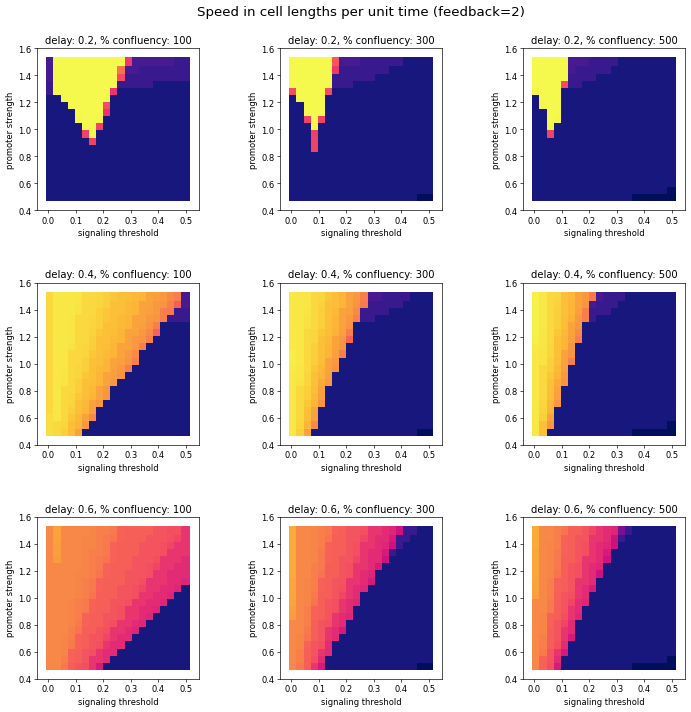

In [62]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=datael3,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["Wavefront speed (cell lengths)", "% confluency", "delay"],
).groupby(
    ["delay", "% confluency", ]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
).opts(
    title="Speed in cell lengths per unit time (feedback=2)",
)


hv.output(plt, dpi=60)

<hr>

In [53]:
# # Some example param sets
# ex_params = np.array([
#     # alpha    k    p  delta  lambda  beta
#     [    1., 0.2,   2,     4,   1e-5,   1], # Speed drops sharply with confluency
#     [    1., 0.3,   2,     4,   1e-5,   1], # Speed drop happens at way lower conf
#     [    1., 0.2,   2,     2,   1e-5,   1], # Speed barely drops
#     [    1., 0.3,   2,     2,   1e-5,   1], # Speed drops gradually with conf
# ])

In [54]:
alpha = 3
k_s = 0.12
p_s = 2
# delta = 3
lambda_ = 0
beta = 1

delay = 0.4

In [55]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [56]:
# el_space = 1 / np.sqrt(np.linspace(1, 3, 12))

# param_space = np.array([
#     *np.repeat(ex_params, el_space.size, axis=0).T,
#     np.tile(el_space, ex_params.shape[0]),
# ]).T

In [62]:
# k_s_space = np.linspace(0.1, 0.5, 5)
delta_space = np.linspace(0, 6, 4)
r_space = 1/np.sqrt(np.linspace(1, 2, 33))

free_params = (delta_space, r_space,)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [63]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansex1 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    delta, r = param_space[i]
    el = (r/np.sqrt(3)).astype(np.float32)
    
    args = (alpha, k_s, p_s, delta, beta, el)
    
    Xel, Adjel = lsig.hex_Adj(L, r=r, csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = lsig.integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansex1[i] = lsig.act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 132/132 [00:09<00:00, 14.00it/s]


In [64]:
dataex1 = pd.DataFrame(
    {
        "delta": param_space[:, 0],
        "cell-cell distance": param_space[:, 1],
        "Mean wavefront speed": vmeansex1,
    }
)

dataex1["% confluency"] = 100 * dataex1["cell-cell distance"] ** -2
dataex1["normalized induction speed"] = dataex1["Mean wavefront speed"] / (
    dataex1["cell-cell distance"]
)

:NdOverlay   [delta]
   :Curve   [% confluency]   (normalized induction speed,delta)
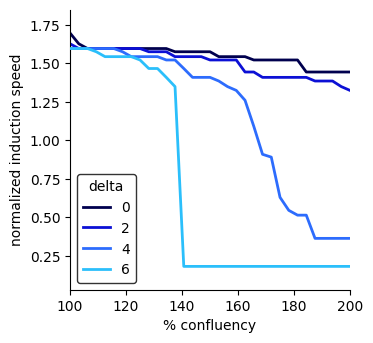

In [66]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 5)

plt = hv.Curve(
    data=dataex1,
    kdims=["% confluency"],
    vdims=["normalized induction speed", "delta"]
).groupby(
    ["delta"]
).opts(
).overlay(
    ["delta"]
# ).opts(
#     show_legend=False,
#     legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
# ).layout(
#     ["feedback strength"]
# ).cols(
#     3
)

hv.output(plt, dpi=100)

In [ ]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 4)

plt = hv.Curve(
    data=dataex1.loc[dataex1["feedback strength"] % 2 == 0, :],
    kdims=["% confluency"],
    vdims=["Wavefront speed (cell lengths)", "signaling threshold", "feedback strength"]
).groupby(
    ["signaling threshold", "feedback strength"]
).opts(
    alpha=0.8,
).overlay(
    ["feedback strength"]
).opts(
#     show_legend=False,
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
).layout(
    ["signaling threshold"]
).cols(3)

hv.output(plt, dpi=60)

<hr>

In [414]:
# # Some example param sets
# ex_params = np.array([
#     # alpha    k    p  delta  lambda  beta
#     [    1., 0.2,   2,     4,   1e-5,   1], # Speed drops sharply with confluency
#     [    1., 0.3,   2,     4,   1e-5,   1], # Speed drop happens at way lower conf
#     [    1., 0.2,   2,     2,   1e-5,   1], # Speed barely drops
#     [    1., 0.3,   2,     2,   1e-5,   1], # Speed drops gradually with conf
# ])

In [101]:
alpha = 1.2
# k_s = 0.2
p_s = 2
# delta = 3
lambda_ = 1e-5
beta = 1

delay = 0.4

In [102]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [103]:
# el_space = 1 / np.sqrt(np.linspace(1, 3, 12))

# param_space = np.array([
#     *np.repeat(ex_params, el_space.size, axis=0).T,
#     np.tile(el_space, ex_params.shape[0]),
# ]).T

In [104]:
k_s_space = np.linspace(0.1, 0.5, 5)
delta_space = np.array([0, 2, 3])
el_space = 1/np.sqrt(np.linspace(1, 2, 21))

free_params = (k_s_space, delta_space, el_space,)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [105]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansex2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    k_s, delta, el = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansex2[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 315/315 [00:21<00:00, 14.35it/s]


In [110]:
dataex2 = pd.DataFrame(
    {
        "signaling threshold": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "edge length": param_space[:, 2],
        "Mean wavefront speed": vmeansex2,
    }
)

dataex2["% confluency"] = 100 * dataex2["edge length"] ** -2
dataex2["Mean speed (normalized)"] = dataex2["Mean wavefront speed"] / (
    dataex2["edge length"] * np.sqrt(3)
)

:NdLayout   [feedback strength]
   :NdOverlay   [signaling threshold]
      :Curve   [% confluency]   (Mean speed (normalized),signaling threshold,feedback strength)
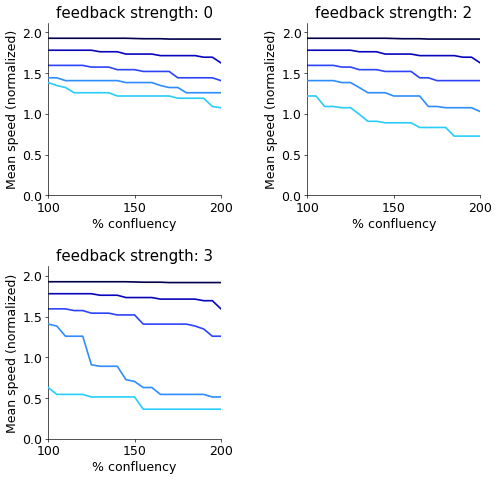

In [128]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 6)

plt = hv.Curve(
    data=dataex2,
    kdims=["% confluency"],
    vdims=["Mean speed (normalized)", "signaling threshold", "feedback strength"]
).groupby(
    ["signaling threshold", "feedback strength"]
).opts(
    ylim=(0, None),
    fontscale=1.5,
).overlay(
    ["signaling threshold"]
).opts(
    show_legend=False,
#     legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
).layout(
    ["feedback strength"]
).opts(
    vspace=0.4,
).cols(2)

hv.output(plt, dpi=60)

<hr>

In [10]:
# # Some example param sets
# ex_params = np.array([
#     # alpha    k    p  delta  lambda  beta
#     [    1., 0.2,   2,     4,   1e-5,   1], # Speed drops sharply with confluency
#     [    1., 0.3,   2,     4,   1e-5,   1], # Speed drop happens at way lower conf
#     [    1., 0.2,   2,     2,   1e-5,   1], # Speed barely drops
#     [    1., 0.3,   2,     2,   1e-5,   1], # Speed drops gradually with conf
# ])

In [576]:
# alpha = 1.
k_s = 0.3
p_s = 2
# delta = 3
lambda_ = 1e-5
beta = 1

delay = 0.4

In [577]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [578]:
# el_space = 1 / np.sqrt(np.linspace(1, 3, 12))

# param_space = np.array([
#     *np.repeat(ex_params, el_space.size, axis=0).T,
#     np.tile(el_space, ex_params.shape[0]),
# ]).T

In [588]:
alpha_space = np.linspace(1., 1.4, 5)
delta_space = np.array([0, 2, 4])
el_space = 1/np.sqrt(np.linspace(1, 2, 21))

free_params = (alpha_space, delta_space, el_space,)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [590]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansex3 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, delta, el = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = hex_Adj(L, el=el, csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansex3[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 315/315 [00:25<00:00, 12.29it/s]


In [591]:
dataex3 = pd.DataFrame(
    {
        "promoter strength": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "edge length": param_space[:, 2],
        "Mean wavefront speed": vmeansex3,
    }
)

dataex3["% confluency"] = 100 * dataex3["edge length"] ** -2
dataex3["Wavefront speed (cell lengths)"] = dataex3["Mean wavefront speed"] / (
    dataex3["edge length"] * np.sqrt(3)
)

:NdLayout   [feedback strength]
   :NdOverlay   [promoter strength]
      :Curve   [% confluency]   (Wavefront speed (cell lengths),promoter strength,feedback strength)
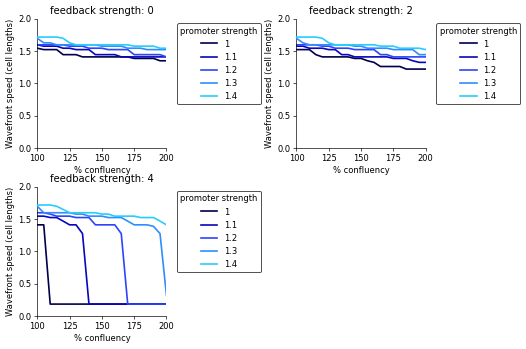

In [604]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 6)

plt = hv.Curve(
    data=dataex3,
    kdims=["% confluency"],
    vdims=["Wavefront speed (cell lengths)", "promoter strength", "feedback strength"]
).groupby(
    ["promoter strength", "feedback strength"]
).opts(
    ylim=(0, 2),
).overlay(
    ["promoter strength"]
).opts(
#     show_legend=False,
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
).layout(
    ["feedback strength"]
).cols(2)

hv.output(plt, dpi=60)

<hr>

In [197]:
alpha = 1
# k_s = 0.1
p_s = 2
# delta = 0
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [198]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [199]:
# alpha_space = np.linspace(1.0, 1.5, 3)
k_s_space = np.linspace(0, 0.5, 21)[1:]
delta_space = np.linspace(0, 4, 5)
beta_space = np.linspace(0., 1., 20)
# el_space = 1/np.sqrt(np.linspace(1, 5, 3))

free_params = (k_s_space, delta_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [200]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel4 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    k_s, delta, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel4[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 2000/2000 [04:53<00:00,  6.81it/s]


In [201]:
datael4 = pd.DataFrame(
    {
        "signaling threshold": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "efficiency": param_space[:, 2],
        "Mean wavefront speed": vmeansel4,
    }
)

# datael4["% confluency"] = 100 * datael4["edge length"] ** -2
# datael4["Wavefront speed (cell lengths)"] = datael4["Mean wavefront speed"] / (datael4["edge length"] * np.sqrt(3))

datael4["% confluency"] = 100
datael4["Wavefront speed (cell lengths)"] = datael4["Mean wavefront speed"] / np.sqrt(3)

:NdLayout   [feedback strength]
   :Points   [signaling threshold,efficiency]   (Wavefront speed (cell lengths),feedback strength)
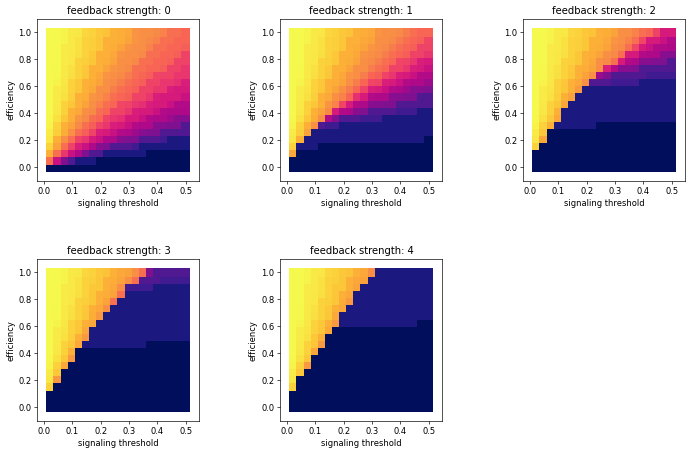

In [202]:
datael1_minconfstdout --no-display

plt = hv.Points(
    data=datael4,
    kdims=["signaling threshold", "efficiency"],
    vdims=["Wavefront speed (cell lengths)", "feedback strength"],
).groupby(
    ["feedback strength"]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [197]:
alpha = 1
# k_s = 0.1
p_s = 2
# delta = 0
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [198]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [199]:
# alpha_space = np.linspace(1.0, 1.5, 3)
k_s_space = np.linspace(0, 0.5, 21)[1:]
delta_space = np.linspace(0, 4, 5)
beta_space = np.linspace(0., 1., 20)
# el_space = 1/np.sqrt(np.linspace(1, 5, 3))

free_params = (k_s_space, delta_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [200]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

vmeansel4 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    k_s, delta, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
    nel = Xel.shape[0]
    sender_idxel = lsig.get_center_cells(Xel)[0]
    E0el = np.zeros(nel, dtype=np.float32)
    E0el[sender_idxel] = 1

    rhs = get_hex_conc_rhs(Adjel, sender_idxel)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansel4[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 2000/2000 [04:53<00:00,  6.81it/s]


In [201]:
datael4 = pd.DataFrame(
    {
        "signaling threshold": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "efficiency": param_space[:, 2],
        "Mean wavefront speed": vmeansel4,
    }
)

# datael4["% confluency"] = 100 * datael4["edge length"] ** -2
# datael4["Wavefront speed (cell lengths)"] = datael4["Mean wavefront speed"] / (datael4["edge length"] * np.sqrt(3))

datael4["% confluency"] = 100
datael4["Wavefront speed (cell lengths)"] = datael4["Mean wavefront speed"] / np.sqrt(3)

:NdLayout   [feedback strength]
   :Points   [signaling threshold,efficiency]   (Wavefront speed (cell lengths),feedback strength)
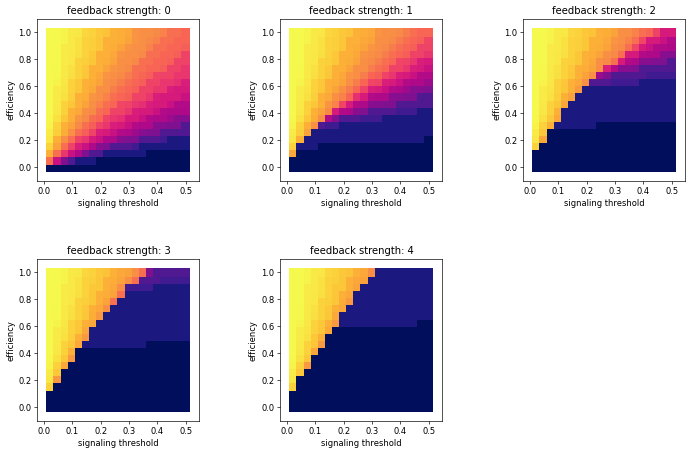

In [202]:
datael1_minconfstdout --no-display

plt = hv.Points(
    data=datael4,
    kdims=["signaling threshold", "efficiency"],
    vdims=["Wavefront speed (cell lengths)", "feedback strength"],
).groupby(
    ["feedback strength"]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [268]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 2
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [269]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [270]:
alpha_space = np.linspace(0.5, 1.5, 20)
k_s_space = np.linspace(0, 0.5, 21)[1:]
# delta_space = np.linspace(0, 4, 3)
# beta_space = np.linspace(0.5, 1., 3)

free_params = (alpha_space, k_s_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [271]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansratio2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s = param_space[i]

    beta = 1
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)
    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )
    vmeanbeta100 = act_vmean(t, Xel, E, 0.1, chull=True) / (el*np.sqrt(3))
    
    beta = 0.5
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)
    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )
    vmeanbeta50 = act_vmean(t, Xel, E, 0.1, chull=True) / (el*np.sqrt(3))
    
    vmeansratio2[i] = vmeanbeta50 / vmeanbeta100

100%|██████████| 400/400 [00:57<00:00,  6.93it/s]


In [272]:
dataratio2 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "speed ratio": vmeansratio2,
})

:Points   [signaling threshold,promoter strength]   (speed ratio)
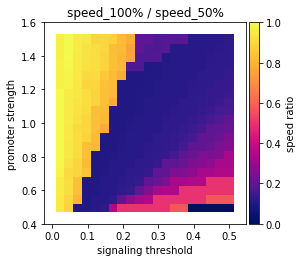

In [273]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=dataratio2,
    kdims=["signaling threshold", "promoter strength"],
    vdims=["speed ratio"],
).opts(
    color="speed ratio",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
#     fontscale=1.2,
    title="speed_100% / speed_50%",
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"speed ratio":(0, 1)}
# ).layout(
# # ).opts(
# #     hspace=0.8,
# #     vspace=0.2,
# ).cols(
#     3
# ).opts(
#     title="Speed in cell lengths per unit time (feedback=0, delay=0.4)",
)


plt

<hr>

In [31]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 4
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [32]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [39]:
alpha_space = np.linspace(0.5, 2.5, 9)
k_s_space = np.logspace(-2, np.log10(0.5), 20)
beta_space = np.linspace(0.05, 1., 20)

free_params = (alpha_space, k_s_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [40]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = hex_Adj(L, el=el, csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansbeta2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansbeta2[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 3600/3600 [04:26<00:00, 13.49it/s]


In [49]:
databeta2 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "% cell-cell contact": param_space[:, 2] * 100,
    "Mean wavefront speed": vmeansbeta2,
})
databeta2["Wavefront speed (cell lengths)"] = databeta2["Mean wavefront speed"] / np.sqrt(3)

# databeta1["% confluency"] = 100 * databeta1["edge length"] ** -2
# databeta1["Wavefront speed (cell lengths)"] = databeta1["Mean wavefront speed"] / (databeta1["edge length"] * np.sqrt(3))

ValueError: arrays must all be same length

:NdLayout   [promoter strength]
   :Points   [signaling threshold,% cell-cell contact]   (Wavefront speed (cell lengths),promoter strength)
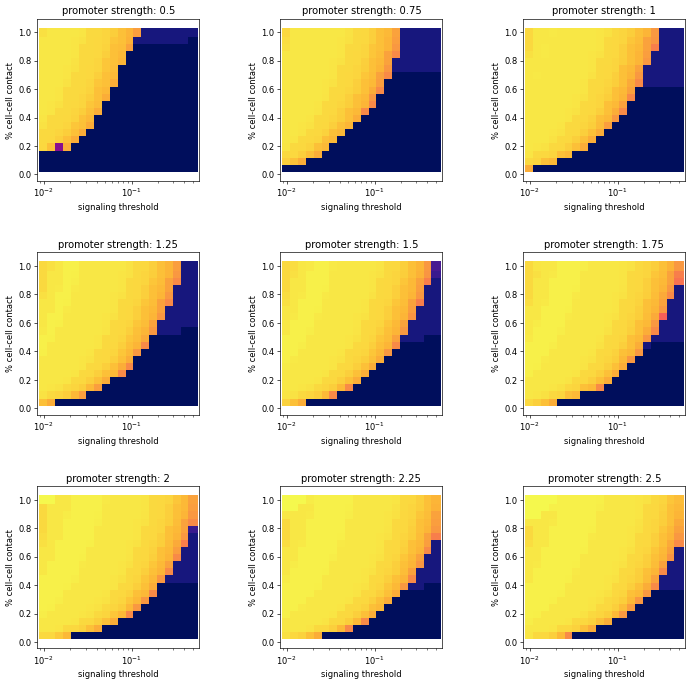

In [50]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=databeta2,
    kdims=["signaling threshold", "% cell-cell contact"],
    vdims=["Wavefront speed (cell lengths)", "promoter strength"],
).groupby(
    ["promoter strength", ]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
    logx=True,
    s=120,
    aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [138]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 4
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [139]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [140]:
alpha_space = np.linspace(1, 2, 3)
k_s_space = np.linspace(0.01, 0.5, 20)
beta_space = np.linspace(0.05, 1., 20)

free_params = (alpha_space, k_s_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [141]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansbeta2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansbeta2[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 1200/1200 [01:05<00:00, 18.33it/s]


In [142]:
databeta2 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "% cell-cell contact": param_space[:, 2] * 100,
    "Mean wavefront speed": vmeansbeta2,
})
databeta2["Wavefront speed (cell lengths)"] = databeta2["Mean wavefront speed"] / np.sqrt(3)

# databeta1["% confluency"] = 100 * databeta1["edge length"] ** -2
# databeta1["Wavefront speed (cell lengths)"] = databeta1["Mean wavefront speed"] / (databeta1["edge length"] * np.sqrt(3))

:NdLayout   [promoter strength]
   :Points   [signaling threshold,% cell-cell contact]   (Wavefront speed (cell lengths),promoter strength)
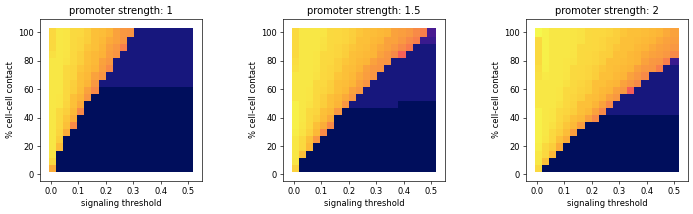

In [143]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=databeta2,
    kdims=["signaling threshold", "% cell-cell contact"],
    vdims=["Wavefront speed (cell lengths)", "promoter strength"],
).groupby(
    ["promoter strength", ]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
#     colorbar=True,
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, 3)}
).layout(
# ).opts(
#     hspace=0.8,
#     vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [180]:
# alpha = 1.5
# k_s = 0.1
p_s = 2
delta = 1
lambda_ = 1e-5
# beta = 1
el = 1

delay = 0.4

In [181]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [182]:
alpha_space = np.linspace(1, 2, 3)
k_s_space = np.linspace(0.01, 0.5, 20)
beta_space = np.linspace(0.05, 1., 20)

free_params = (alpha_space, k_s_space, beta_space)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [183]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansbeta2 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, k_s, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansbeta2[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 1200/1200 [01:00<00:00, 19.84it/s]


In [184]:
databeta2 = pd.DataFrame({
    "promoter strength": param_space[:, 0],
    "signaling threshold": param_space[:, 1], 
    "% cell-cell contact": param_space[:, 2] * 100,
    "Mean wavefront speed": vmeansbeta2,
})
databeta2["Wavefront speed (cell lengths)"] = databeta2["Mean wavefront speed"] / np.sqrt(3)

# databeta1["% confluency"] = 100 * databeta1["edge length"] ** -2
# databeta1["Wavefront speed (cell lengths)"] = databeta1["Mean wavefront speed"] / (databeta1["edge length"] * np.sqrt(3))

:NdLayout   [promoter strength]
   :Points   [signaling threshold,% cell-cell contact]   (Wavefront speed (cell lengths),promoter strength)
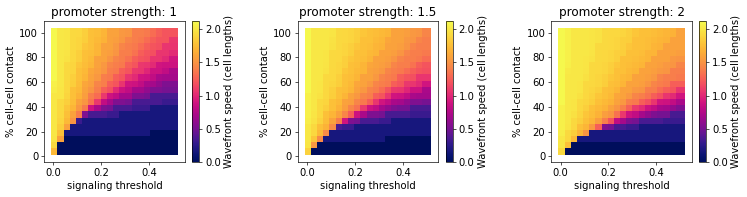

In [188]:
%%capture --no-stdout --no-display

plt = hv.Points(
    data=databeta2,
    kdims=["signaling threshold", "% cell-cell contact"],
    vdims=["Wavefront speed (cell lengths)", "promoter strength"],
).groupby(
    ["promoter strength", ]
).opts(
    color="Wavefront speed (cell lengths)",
    cmap=cc.CET_L8,
#     logx=True,
    s=120,
#     aspect=2.3,
    padding=0.1,
    colorbar=True,
    fontscale=1.2
).options(
    {'Points': {'marker': "s", 
#                 "edgecolor": "white",
               }}
).redim.range(
    **{"Mean wavefront speed":(0, None)}
).layout(
).opts(
    hspace=0.8,
    vspace=0.2,
).cols(
    3
# ).opts(
#     title="Speed in cell lengths per unit time (delay=0.4)",
)


hv.output(plt, dpi=60)

<hr>

In [43]:
# alpha = 1.
k_s = 0.3
p_s = 2
# delta = 3
lambda_ = 1e-5
# beta = 1
el = 1.

delay = 0.4

In [44]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [63]:
alpha_space = np.linspace(1., 1.5, 6)
delta_space = np.linspace(0, 4, 5)
beta_space = np.linspace(0.5, 1., 20)

free_params = (alpha_space, delta_space, beta_space,)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [64]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = hex_Adj(L, el=el, csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansbeta3 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, delta, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansbeta3[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 600/600 [00:59<00:00, 10.15it/s]


In [65]:
databeta3 = pd.DataFrame(
    {
        "promoter strength": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "% cell-cell contact": param_space[:, 2] * 100,
        "Mean wavefront speed": vmeansbeta3,
    }
)

databeta3["Wavefront speed (cell lengths)"] = databeta3["Mean wavefront speed"] / np.sqrt(3)

# dataex3["% confluency"] = 100 * dataex3["edge length"] ** -2
# dataex3["Wavefront speed (cell lengths)"] = dataex3["Mean wavefront speed"] / (
#     dataex3["edge length"] * np.sqrt(3)
# )

:NdLayout   [feedback strength]
   :NdOverlay   [promoter strength]
      :Curve   [% cell-cell contact]   (Wavefront speed (cell lengths),promoter strength,feedback strength)
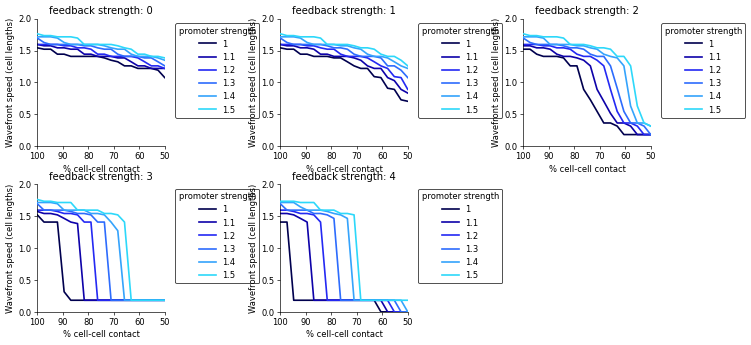

In [70]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 7)

plt = hv.Curve(
    data=databeta3,
    kdims=["% cell-cell contact"],
    vdims=["Wavefront speed (cell lengths)", "promoter strength", "feedback strength"]
).groupby(
    ["promoter strength", "feedback strength"]
).opts(
    ylim=(0, 2),
    xlim=(100, 50),
).overlay(
    ["promoter strength"]
).opts(
#     show_legend=False,
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
).layout(
    ["feedback strength"]
).cols(3)

hv.output(plt, dpi=60)

<hr>

In [171]:
# alpha = 1.
k_s = 0.3
p_s = 2
# delta = 3
lambda_ = 1e-5
# beta = 1
el = 1.

delay = 0.4

In [172]:
dt = 0.005
tmax = 5
t = np.linspace(0, tmax, int(tmax / dt) + 1)

In [173]:
alpha_space = np.linspace(1., 2., 6)
delta_space = np.array([0, 2, 3])
beta_space = np.linspace(0.5, 1., 20)

free_params = (alpha_space, delta_space, beta_space,)

param_space = np.meshgrid(*free_params)
param_space = np.array(param_space).T.reshape(-1, len(free_params))

In [174]:
n_runs = param_space.shape[0]

iterator = range(n_runs)
iterator = tqdm.tqdm(iterator)

Xel, Adjel = lsig.hex_Adj(L, r=el*np.sqrt(3), csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

vmeansbeta3 = np.empty(n_runs, dtype=np.float32)
for i in iterator:
    alpha, delta, beta = param_space[i]
    args = (alpha, k_s, p_s, delta, lambda_, beta, el)

    E = integrate_DDE(
        t_span=t,
        rhs=rhs,
        dde_args=args,
        E0=E0el,
        delay=delay,
        progress_bar=False,
    )

    vmeansbeta3[i] = act_vmean(t, Xel, E, 0.1, chull=True)

100%|██████████| 360/360 [00:18<00:00, 19.46it/s]


In [175]:
databeta3 = pd.DataFrame(
    {
        "promoter strength": param_space[:, 0],
        "feedback strength": param_space[:, 1],
        "% cell-cell contact": param_space[:, 2] * 100,
        "Mean wavefront speed": vmeansbeta3,
    }
)

databeta3["Mean speed (normalized)"] = databeta3["Mean wavefront speed"] / np.sqrt(3)

# dataex3["% confluency"] = 100 * dataex3["edge length"] ** -2
# dataex3["Wavefront speed (cell lengths)"] = dataex3["Mean wavefront speed"] / (
#     dataex3["edge length"] * np.sqrt(3)
# )

:NdLayout   [feedback strength]
   :NdOverlay   [promoter strength]
      :Curve   [% cell-cell contact]   (Mean speed (normalized),promoter strength,feedback strength)
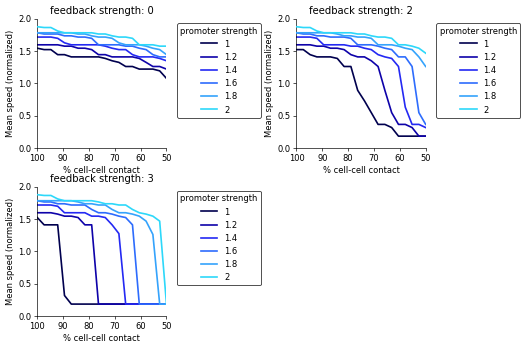

In [179]:
%%capture --no-stdout --no-display

cycle = sample_cycle(cc.kbc, 7)

plt = hv.Curve(
    data=databeta3,
    kdims=["% cell-cell contact"],
    vdims=["Mean speed (normalized)", "promoter strength", "feedback strength"]
).groupby(
    ["promoter strength", "feedback strength"]
).opts(
    ylim=(0, 2),
    xlim=(100, 50),
#     fontscale=1.5
).overlay(
    ["promoter strength"]
).opts(
#     show_legend=False,
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
).layout(
    ["feedback strength"]
).cols(2)

hv.output(plt, dpi=60)

<hr>

Simulate a cell with dropping beta!

In [295]:
alpha = 1.5
k_s = 0.3
p_s = 2
delta = 1
lambda_ = 1e-5
# beta = 1
el = 1.

delay = 0.4

In [296]:
dt = 0.005
tmax = 5
nt = int(tmax / dt) + 1
t = np.linspace(0, tmax, nt)

In [297]:
rel = el*np.sqrt(3)
Xel, Adjel = lsig.hex_Adj(L, r=rel, csr=False)
nel = Xel.shape[0]
sender_idxel = lsig.get_center_cells(Xel)[0]
E0el = np.zeros(nel, dtype=np.float32)
E0el[sender_idxel] = 1

rhs = get_hex_conc_rhs(Adjel, sender_idxel)

In [298]:
# beta_hi = beta_lo = 0.5
# betas = np.linspace(beta_hi, beta_lo, nt)
beta_hi, beta_lo = 1, 0.5
betas = np.array([*[beta_hi]*(nt//4), *np.linspace(beta_hi, beta_lo, nt//4), *[beta_lo]*(nt - 2*(nt//4))])
fname = f"hex_conc_alpha{alpha:.1f}_k{k_s:.1e}_p{p_s:.1f}_delta{delta:.1f}_lambda{lambda_:.1e}_el{el:.1f}_tau{delay:.2f}_betas{beta_hi:.1f}-{beta_lo:.1f}_title2"
print(fname)

rads = np.repeat(lsig.beta_to_rad(betas, rel)[:, np.newaxis], n, axis=1)

hex_conc_alpha1.5_k3.0e-01_p2.0_delta1.0_lambda1.0e-05_el1.0_tau0.40_betas1.0-0.5_title2


In [299]:
# Initialize beta (doesn't matter)
beta = 1.

args = (alpha, k_s, p_s, delta, lambda_, beta, el)

E_betas = integrate_DDE_varbeta(
    t_span=t,
    rhs=rhs,
    betas=betas,
    dde_args=args,
    E0=E0el,
    delay=delay,
    progress_bar=True,
)

100%|██████████| 1000/1000 [00:00<00:00, 17193.08it/s]


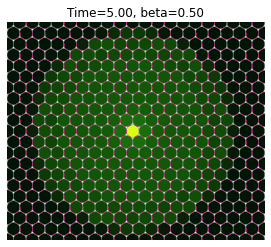

In [292]:
title_fun = lambda i: f"Time={t[i]:.2f}, beta={betas[i]:.2f}"

lsig.inspect_out(
    Xel,
    rads[-1],
    L,
    E_betas, 
#     vmin=0, 
#     vmax=4, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    ppatch_kwargs=dict(edgecolor='gray', linewidth=0.5),
    lcoll_kwargs=dict(linewidth=0.8),
    title=title_fun(nt-1)
)

Writing to: plots\hex_conc_alpha1.5_k3.0e-01_p2.0_delta1.0_lambda1.0e-05_el1.0_tau0.40_betas1.0-0.5_title


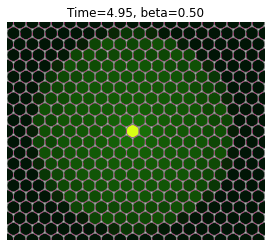

In [293]:
lsig.animate_var(
    Xel,
    rads,
    L,
    E_betas,
#     n_frames=100,
    file_name=fname,
#     dir_name="plots",
#     fps=20, 
#     vmin=0, 
#     vmax=4, 
    cmap="kgy",
    ifcc=cc.CET_L8[110],
    lcoll_kwargs=dict(linewidth=0.5),
    title_fun=title_fun
)